In [2]:
%matplotlib inline
import pandas as pd 
import datetime
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from math import pi

In [3]:
troca_persons = pd.read_csv('/home/jonathan/Escritorio/orgaDeDatos/fiuba-trocafone-tp1-final-set/events.csv',low_memory = False)

In [4]:
#Diversidad de columnas del df
troca_persons.columns

Index(['timestamp', 'event', 'person', 'url', 'sku', 'model', 'condition',
       'storage', 'color', 'skus', 'search_term', 'staticpage',
       'campaign_source', 'search_engine', 'channel', 'new_vs_returning',
       'city', 'region', 'country', 'device_type', 'screen_resolution',
       'operating_system_version', 'browser_version'],
      dtype='object')

In [5]:
#Previo chequeo de nulos en la columna person:

troca_persons.person.isnull().values.any()

False

## Diversidad de personas 

In [6]:
personas = troca_persons.person.value_counts()
personas

71492f2b    2771
6b07be7b    2770
285101a1    2140
3e34b3cf    1877
2d5a84c1    1800
5f25cb5d    1797
5af7e2bc    1773
3b5a5833    1705
d7e60792    1352
cd6e0b8d    1254
d9251b63    1234
c501ff3a    1201
778fcfbd    1195
a7d3181e    1185
e2b0ce1b    1168
c38d5de3    1162
6d2fe2db    1110
88cabe99    1073
ba102035    1014
ff9dc4b8    1005
b7db0194    1003
a94ab0df     990
e27ec493     978
55d9fd71     973
8e0c69f6     958
63112254     955
d5661793     950
badaab79     930
3444791f     913
9fdfd942     907
            ... 
25aa4cb5       1
7dd7b2be       1
bfb05658       1
142d70d8       1
068f9114       1
5c61b14a       1
3531c964       1
3680696e       1
2282e818       1
3a3f6b0a       1
dd80f303       1
d57b091b       1
a33b1b4f       1
91e2563e       1
37a61159       1
90c60011       1
ddb0832f       1
1486947d       1
b29ab778       1
b1453674       1
c82d1286       1
61053b3c       1
b766c6bb       1
561b2e95       1
f6d97ad4       1
5ad6e422       1
bec2bbe5       1
b65007ce      

## Diversidad de eventos por persona

In [7]:
# Chequeo de nulos en la columna event
troca_persons.event.isnull().values.any()

False

In [8]:
personasPorEvento = troca_persons[['event','person']]

PPE = personasPorEvento.groupby('person')['event'].count().sort_values(ascending = False).reset_index()

PPE.head(10).person.values


array(['71492f2b', '6b07be7b', '285101a1', '3e34b3cf', '2d5a84c1',
       '5f25cb5d', '5af7e2bc', '3b5a5833', 'd7e60792', 'cd6e0b8d'],
      dtype=object)

## 15 personas con  mas cantidad de eventos

Text(0.5,6.8,'Quince personas con mas eventos')

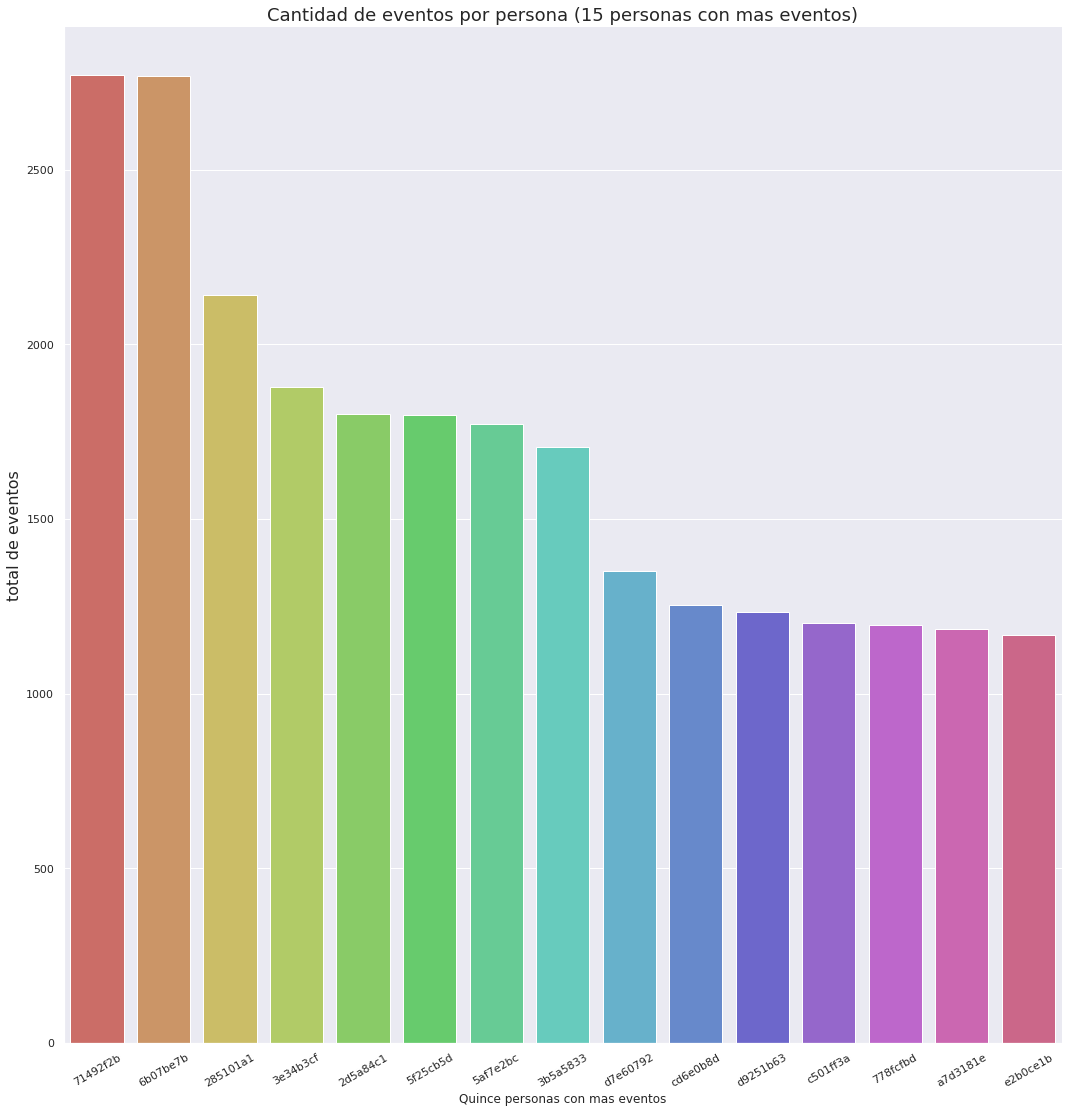

In [9]:
g = sns.catplot(x="person", y="event", kind = "bar", data = PPE.head(15), height = 15,aspect = 1, palette="hls")
g.set_xticklabels(rotation=30)
plt.title('Cantidad de eventos por persona (15 personas con mas eventos)', fontsize = 18)
plt.ylabel('total de eventos', fontsize = 16)
plt.xlabel('Quince personas con mas eventos', fontsize = 12)

## Comparemos las 10 personas con mas eventos

In [10]:
diezPersonasConMasEvents = np.array(PPE.head(10).person.values)
events = troca_persons[troca_persons['person'].isin(diezPersonasConMasEvents)]
events = pd.crosstab(events.person , events.event)
events

event,ad campaign hit,brand listing,checkout,conversion,generic listing,lead,search engine hit,searched products,staticpage,viewed product,visited site
person,,,,,,,,,,,
285101a1,74,657,7,1,244,0,12,7,0,1077,61
2d5a84c1,61,50,3,0,7,0,6,6,0,1525,142
3b5a5833,33,6,20,0,67,2,25,0,1,1383,168
3e34b3cf,4,36,10,0,141,0,0,59,1,1487,139
5af7e2bc,220,627,4,2,2,1,2,23,7,728,157
5f25cb5d,53,542,3,2,281,1,37,14,32,681,151
6b07be7b,59,780,13,6,424,0,6,87,14,1118,263
71492f2b,61,1149,3,0,71,1,0,15,4,1364,103
cd6e0b8d,19,18,7,0,9,0,3,1,0,1174,23


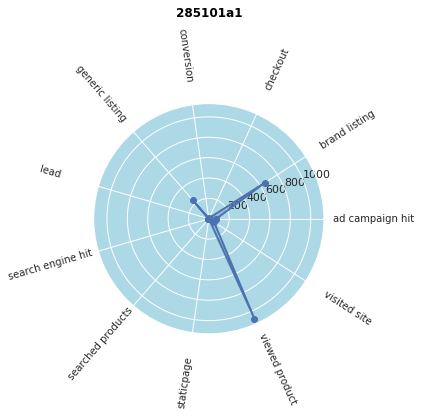

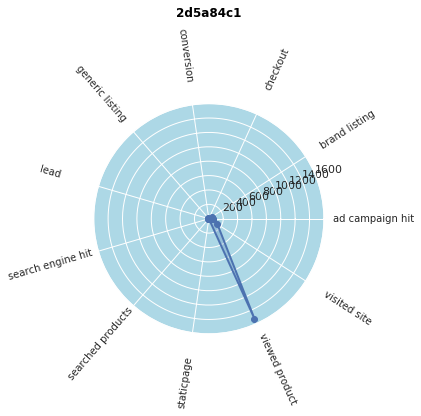

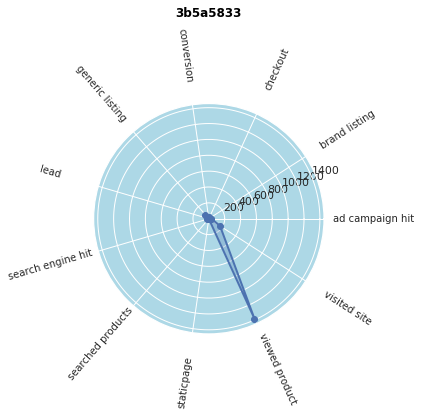

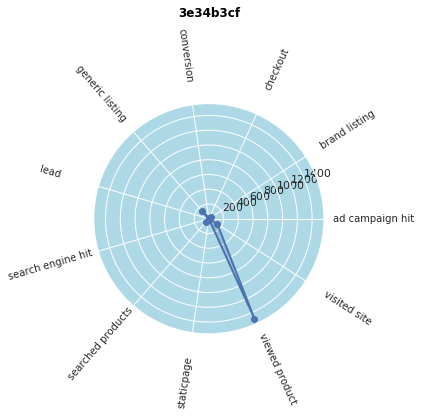

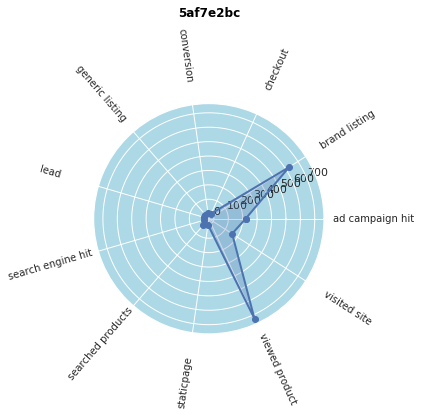

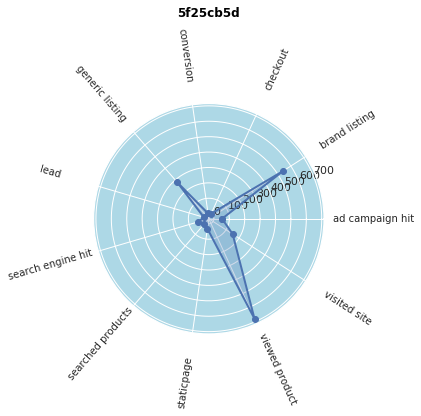

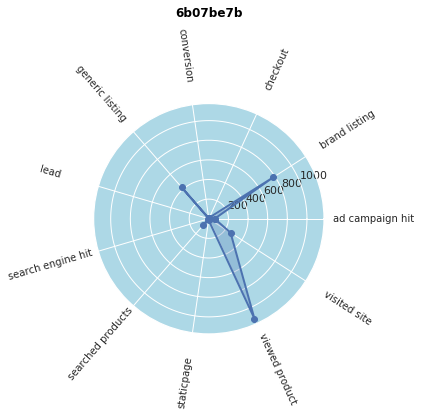

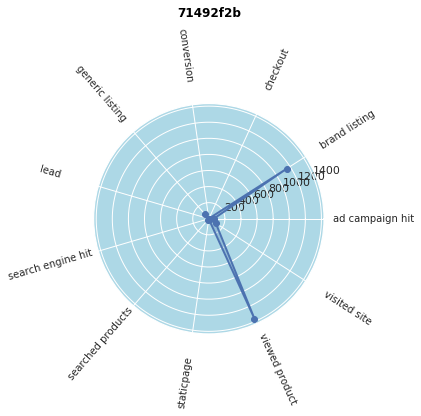

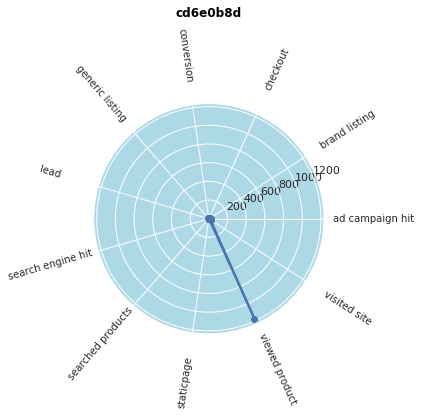

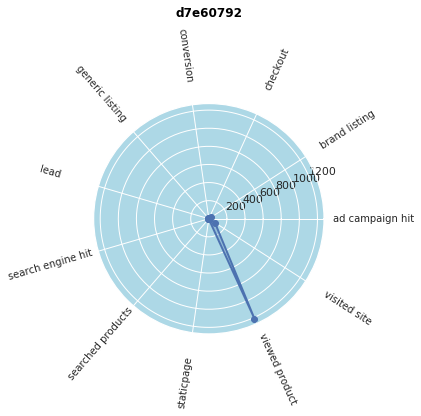

In [11]:

# ------- PARTE 1: Defino una funcion que hace un plot recibiendo etiquetas, los stats de las columnas 
# y el titulo del plot

def hacerRadarChart( labels, stats, nombrePersona):
  
    #Establezco el ángulo de las coordenadadas polares. 
    #Y usamos el np.concatenate para dibujar un recinto cerrado para el radar chart."""
    angles = np.linspace(0,2*np.pi,len(labels), endpoint=False)
    # cerrando el plot
    stats=np.concatenate((stats,[stats[0]]))
    angles=np.concatenate((angles,[angles[0]]))

    #Creo una figura
    fig= plt.figure(figsize=(4,4))

    ax = fig.add_axes([0.1, 0.1, 0.8, 0.8],projection='polar', facecolor='lightblue')

    fig.text(0.5, 1.20, nombrePersona,
             horizontalalignment='center', color='black', weight='bold', size='large')

    #Defino metricas de la figura y dibujo el plot
    ax.plot(angles, stats, 'o-', linewidth=2)
    ax.set_rmax(1)

    #Grafico el area de stats
    ax.fill(angles, stats, alpha=0.25)

    #Grafico los labels
    ax.set_thetagrids(angles * 180/np.pi, labels)

    #Defino una orientacion diagonal para labels en grados
    ticks= np.linspace(0,360,12)[:-1] 
    #Convierto a radianes
    ax.set_xticks(np.deg2rad(ticks))

    #Redibujo la figura
    plt.gcf().canvas.draw_idle()
    #sumo pi al angulo de cada label si el coseno da negativo(invierte el sentido de la palabra)
    angles[np.cos(angles) < 0] = angles[np.cos(angles) < 0] + np.pi
    #Paso radianes a grados
    angles = np.rad2deg(angles)

    #itero sobre dos listas en paralelo: angulos y labels
    for label, angle in zip(ax.get_xticklabels(), angles):
        #obtengo la posicion en x,y de cada label
        x,y = label.get_position()
        #obtengo el label y le aplico una transformacion, cambio la distancia hacia el chart
        lab = ax.text(x,y-0.29, label.get_text(), transform=label.get_transform(),
                      ha=label.get_ha(), va=label.get_va())
        #roto el label el angulo obtenido en angles
        lab.set_rotation(angle)

    #Elimino las etiquetas por defecto del chart
    ax.set_xticklabels([])

    ax.grid(True)


# ------- PARTE 2: Aplico la funcion para cada persona

for x in range(0, 10):
    stats = np.array(pd.to_numeric(events.reset_index().iloc[x,1:12].values))
    nombrePersona = events.reset_index().iloc[x,0]
    hacerRadarChart( labels= np.array(events.columns), stats=stats, nombrePersona = nombrePersona)


#### En general se observan muy pocas conversiones ,muchas vistas de productos y bastantes 'brand listing'

## Cual es la proporcion de personas en 'Brazil' en el mes de Mayo

In [12]:
#Me quedo con el mes de Mayo
persons1 = troca_persons[(troca_persons['timestamp'].str.contains("2018-05"))]

#Me quedo con Brazil y visited site
persons = persons1[(persons1['event'] == 'visited site') & (persons1['country'] == 'Brazil')]
persons['timestamp'] = pd.to_datetime(persons['timestamp'])

#Saco la cantidad de personas
cantidadDePersonasEnMayoBrazil = persons.groupby('country')['person'].count().values.sum()

#Cantidad de personas total en Mayo
persons2 = persons1[(persons1['event'] == 'visited site')]
totalPersonsEnMayo = persons2.groupby('country')['person'].count().values.sum()

#Saco la proporcion
(cantidadDePersonasEnMayoBrazil / totalPersonsEnMayo)*100

/home/jonathan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


96.53187831676509

*Brazil representa el 96% de las visitas al sitio en el mes de mas conversiones*

# El funnel

## 1.- Top of the funnel (TOFU)
* Esta fase es la más alta del embudo. Aquella en la que entran la mayor parte de los leads. Es una etapa de descubrimiento de la marca, el primer contacto. Por eso, la información que se da en esta fase tiene el objetivo de informar.


#### Origen de campania

In [13]:
#Miro la cantidad de usuarios que visitan el site dependiendo como llegaron al sitio
#Obtengo los visitantes
visitas = troca_persons[(troca_persons['event'] == 'visited site')]
v = visitas[['person']]
personasQueVisitaron = v['person'].values

#Obtengo de esos visitantes los que entran en 'campaign source'
origenDeCampania = troca_persons[troca_persons['person'].isin(personasQueVisitaron)]
oC = origenDeCampania[['person','campaign_source']].dropna()

In [14]:
oc = oC.groupby('campaign_source')['person'].count().sort_values(ascending = False)
oc = pd.DataFrame(data = oc)
oc['personlog'] = np.log(oc['person'])
oc = oc.reset_index()
oc

,campaign_source,person,personlog
0,google,58074,10.969473
1,criteo,9680,9.177817
2,rtbhouse,8534,9.051813
3,zanox,1648,7.407318
4,emblue,1352,7.209340
5,FacebookAds,759,6.632002
6,afilio,692,6.539586
7,bing,484,6.182085
8,voxus,432,6.068426
9,rakuten,308,5.730100


* Se puede notar que la mayoria de las visitas se originan en 'google' y le sigue en liderazgo 'criteo'.
* Se podria considerar que una cantidad baja de visitas tiene poca probabilidad de realizar conversiones
  por lo que desde 'datacrush' hacia abajo son plataformas de muy poca repercusion positiva en el sitio.

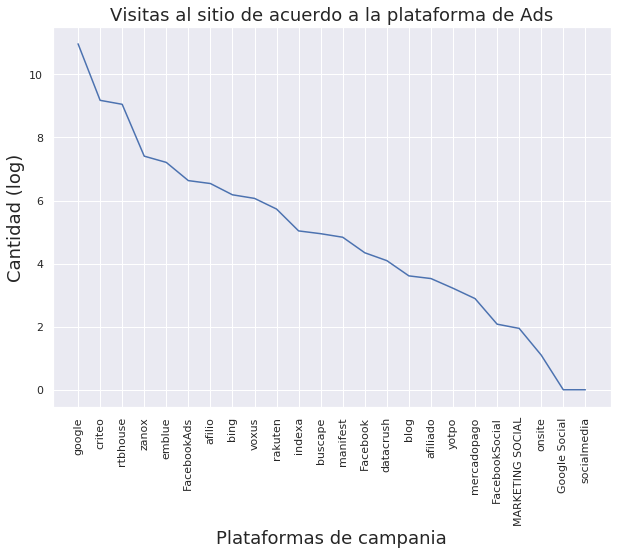

In [15]:
#Pequenio grafico

fig, ax = plt.subplots(figsize=(10,7))
ax.plot(oc['campaign_source'].values, oc['personlog'].values)
plt.xticks(rotation=90)

plt.title('Visitas al sitio de acuerdo a la plataforma de Ads', fontsize = 18)
plt.xlabel('Plataformas de campania',fontsize = 18)
plt.ylabel('Cantidad (log)',fontsize = 18)

plt.show()




* La interpretacion del grafico: cada vez que me corro mas en Plataformas la cantidad de gente que entro al sitio desciende.
* socialmedia,Google Social podrian ser una posibilidad de descarte para buscar otras plataformas de mas actividad


#### Cual es la relacion de la cantidad de visitas al sitio dependiendo del dispositivo utilizado?

In [16]:
dispUtilizadoVisitas = troca_persons[(troca_persons['event'] == 'visited site') & (troca_persons['device_type'])]
dispUtilizadoVisitas1 = dispUtilizadoVisitas.groupby('device_type')['event'].count()
dispUtilizadoVisitas1.sort_values(ascending = False)


device_type
Smartphone    44239
Computer      41790
Tablet         1234
Unknown         115
Name: event, dtype: int64

* En su mayoria se accede desde el Smartphone y la tablet casi esta en desuso

#### Cual es la resolucion de pantalla mas frecuente utilizada para acceder al sitio?

In [17]:
dispUtilizadoVisitas2 = troca_persons[['screen_resolution', 'device_type']]

trocaResolution = troca_persons[(troca_persons['event'] == 'visited site') & (troca_persons['screen_resolution']) ]
res = trocaResolution [['device_type','screen_resolution','event']]
#Me quedo con los 30 con mas visitas
res1 = res.groupby('screen_resolution')['event'].count().sort_values(ascending = False).head(30)

res1

screen_resolution
360x640      30009
1366x768     21379
320x534       3622
1920x1080     3521
320x570       2561
1360x768      2476
1600x900      2435
1024x768      2362
1440x900      2210
1280x1024     1914
320x568       1780
1280x720      1139
1280x800      1102
1536x864      1057
412x732        934
375x667        931
424x753        744
320x480        600
320x569        551
600x1024       432
1680x1050      373
1280x768       343
1024x600       317
768x1024       316
414x736        231
640x360        227
480x800        215
1093x615       208
360x740        203
320x427        163
Name: event, dtype: int64

* La resolucion mas utilizada es la de 360*640 y pertenece a un smartphone
* La resolucion siguiente es de PC 

#### Cuales son los terminos mas buscados?

In [18]:
troca_persons['search_term'].dropna().value_counts()

Iphone                   1207
Iphone 6                 1057
iPhone 6                 1005
iphone 6                  932
iphone                    882
iphone 6s                 784
Iphone 6s                 736
iPhone 6s                 716
Motorola                  679
iPhone                    638
J7                        580
J5                        540
Samsung                   513
S7                        474
iphone 7                  428
Iphone 7                  412
iPhone 7                  371
j7                        370
s8                        354
S8                        346
Iphone 5s                 343
iPhone 5s                 339
IPhone 6                  315
iphone 5s                 315
j5                        310
S6                        302
s7                        289
6s                        270
Iphone 6 plus             256
Lg                        252
                         ... 
Galaxy a 5                  1
Sony Xperia C5              1
Samsung Ga

* En general lidera la busqueda el iphone y en dispositivos con Android la marca Motorola y modelos como el J7, J5 de Samsung.
* Como articulos no smartphones : Smartwatch, CARREGADORES SAMSUMG son los menos buscados.
* El termino 'Novo' no lidera las busquedas de manera que los usuarios apuntan a lo que la web brinda

#### Cual es  el navegador web  mas utilizado desde el cual acceden los visitantes?

In [59]:
navegador = troca_persons[(troca_persons['event'] == 'visited site') & (troca_persons['browser_version'])]
#Me quedo con los 30 mas importantes
navegador.groupby('browser_version')['event'].count().sort_values(ascending = False).head(30)

browser_version
Chrome 66.0             22611
Chrome Mobile 66.0      17513
Chrome 65.0              6635
Chrome Mobile 65.0       5665
Chrome Mobile 64.0       3083
Chrome 67.0              3073
Chrome Mobile 67.0       2683
Chrome 64.0              2450
Mobile Safari 11         2071
Chrome Mobile 39         1639
Chrome 63.0              1490
Chrome Mobile 63.0       1413
Samsung Internet 6.4     1056
Firefox 60               1049
Firefox 59                918
Mobile Safari 10          703
Edge 16.16299             658
Chrome 49.0               602
Chrome Mobile 62.0        568
Chrome Mobile 55.0        527
Chrome Mobile 43.0        422
Chrome Mobile 61.0        390
IE 11                     385
Opera 53.0                271
Opera 52.0                269
Chrome Mobile 56.0        264
Chrome Mobile 57.0        262
Chrome Mobile 58.0        255
Chrome Mobile 59.0        254
Chrome Mobile 50.0        246
Name: event, dtype: int64

* Se puede observar que el navegador de chrome es el mas utilizado tanto en PC como en movil, la razon del PC es porque Chrome es un navegador agil, y en la version mobile es el que viene por defecto en la mayoria de los dispositivos con Android.
* Curiosamente el navegador Firefox no sigue en relevancia a Chrome
* Conclusion: reforzar anuncios que se puedan mostrar en el browser de chrome es una buena idea

#### Cual es el sistema operativo mas utilizado por los visitantes?

In [ ]:
sistOp = troca_persons[(troca_persons['event'] == 'visited site') & (troca_persons['operating_system_version'])]
#Me quedo con los 30 mas importantes
reso.groupby('operating_system_version')['event'].count().sort_values(ascending = False).head(30)

* En su mayoria se sigue utilizando Windows 7 en la actualidad, tal vez por ser actualmente Windows 10 un SO de pago.
* En la version Mobile lidera Android 7
* iOS, Linux y Windows Phone son numeros un poco bajos en relacion a lo que espera el sitio.

**Conclusiones :**
* La mayor parte de visitas provienen desde Brasil y US llegando gracias a google y criteo.
* La mayor parte de dispositivos utilizados son PC's y Smartphones 
* Entre los terminos mas buscados esta iphone y Motorola liderando los android junto a Samsung j7 y j5.
* Habria que analizar como impacta la resolucion de pantalla o el navegador utilizado en las conversiones.
* Habria que analizar como impacta el navegador utilizado en la formacion de leads.

## 2. Middle of the funnel (MOFU)

* En esta etapa el lead se considera aún un tanto receptivo. Está en una etapa de consideración, en la que evaluará las posibles alternativas que darán respuesta a sus necesidades.

#### Como se relaciona la cantidad de users nuevos y la cantidad de recurrentes?

In [ ]:
# Analizo la cantidad de usuarios nuevos y los recurrentes
usersNew =  troca_persons[['person','new_vs_returning']]
#Elimino los nulos
usersNew = usersNew.dropna()
usersNew.groupby('new_vs_returning')['person'].count()

*Se observa una gran cantidad de recurrentes*
* Esto se puede deber a dos cosas:
    * La cantidad de recurrentes hace referencia a usuarios que entraban antes de enero del 2018 mas los que entraron hasta junio.
    * La cantidad de usuarios nuevos no clasificados ('NaN') podria aportar algo a la categoria New.

**Cual es la cantidad de leads en relacion a la cantidad de visitas?**

In [ ]:
leads = troca_persons[(troca_persons['event'] == 'lead')]
#Me quedo con los 30 mas importantes
l = leads.groupby('person')['event'].count().sort_values(ascending = False).head(30)
l

In [ ]:
#Cantidad de leads
l.sum()

* La cantidad de leads es baja, esto es debido a que el termino lead utilizado en el contexto labolar de Trocafone hace referencia al user que se registra para obtener noticias  en el futuro sobre disponibilidad de stock de un producto faltante actual.
* Ademas se puede notar que el sitio ofrece una buena diversidad de dispositivos lo que lleva a pensar que la cantidad de leads deberia ser baja.

**Cual es la proporcion de busquedas en el sitio**

In [ ]:
buscados = troca_persons[troca_persons['event'] == 'searched products']

In [ ]:
#Cantidad de busquedas desde el sitio
cant = buscados.groupby('person')['event'].count().sum()
cant

In [ ]:
#Proporcion de cantidad de busquedas desde el sitio sobre la cantidad total de visitas del sitio
visitas = troca_persons[troca_persons['event'] == 'visited site']
total = visitas.groupby('person')['event'].count().sum()

prop = cant / total
#Proporcion en porcentaje
print(np.round(prop * 100) ,'%')


#### Cual es la cantidad de paginas visitadas en Mayo respecto del total de meses?

In [ ]:
#Paginas visitadas en mayo
visitsPages = troca_persons[(troca_persons['event'] == 'staticpage') & (troca_persons['timestamp'].str.contains("2018-05"))]
VP = visitsPages.groupby('person')['event'].count().sum()
#Paginas visitadas en el total del semestre
totalPages = troca_persons[(troca_persons['event'] == 'staticpage')]
TP = totalPages.groupby('person')['event'].count().sum()
#Proporcion:
VP / TP

* Alrededor del 42 por ciento visito mas cantidad de paginas en el sitio en el mes de Mayo
* Mayo es un mes de mucho flujo de personas

**Cual es la cantidad de listados que visitan los usuarios?**

In [ ]:
listados = troca_persons[(troca_persons['event'] == 'brand listing')]
cant1 = listados.groupby('person')['event'].count().sum()
cant1
#Cantidad de listados visitados por los users

#### Y en el mes de Mayo?

In [ ]:
#cantidadDeListados vistos en Mayo
listMayo = troca_persons[(troca_persons['event'] == 'brand listing') & (troca_persons['timestamp'].str.contains("2018-05"))]
cant2 = listMayo.groupby('person')['event'].count().sum()
cant2
#Cantidad de listados visitados por los users

In [ ]:
# Proporcion
cant2 / cant1

* Observese que las proporciones son parecidas esto tambien tiene coherencia con la cantidad de visitas en Mayo

## 3.- Bottom of the funnel (BOFU)

* Cuando el usuario llega a esta fase se puede determinar que ha superado el funnel y está dispuesto a realizar la conversión. En este punto, el lead se podrá convertir en cliente y realizar una compra.

#### Cual es la cantidad de checkouts vs conversiones?

In [ ]:
checks = troca_persons[(troca_persons['event'] == 'checkout')]
checks.groupby('person')['event'].count().sum()
#Cantidad total de checkouts

In [ ]:
convs = troca_persons[(troca_persons['event'] == 'conversion')]
convs.groupby('person')['event'].count().sum()
#Cantidad total de conversiones

## Checkouts vs  conversiones mes de Mayo

In [20]:
check = persons1[persons1['event'] == 'checkout']
cnv = persons1[persons1['event'] == 'conversion']
cnv1 = cnv.groupby('person')['event'].count()
checks = check.groupby('person')['event'].count()


In [21]:
#Dataframe con las personas que convirtieron en Mayo de todos los paises
cnv2 = cnv1.reset_index()
cnv2.rename(columns={'event': 'cantidad_Conversiones'}, inplace=True)
cnv2 = cnv2.sort_values(by='cantidad_Conversiones',ascending = False)

In [22]:
#Dataframe con las personas que realizaron Checkouts en Mayo de todos los paises
checks1 = checks.reset_index()
checks1.rename(columns={'event': 'cantidad_Checkouts'}, inplace=True)
checks1 = checks1.sort_values(by='cantidad_Checkouts',ascending = False)


In [23]:
#hago el left join
checksVsVisits = pd.merge(checks1, cnv2,on = 'person', how='left').dropna()


Text(35.5,0.5,'Conversiones')

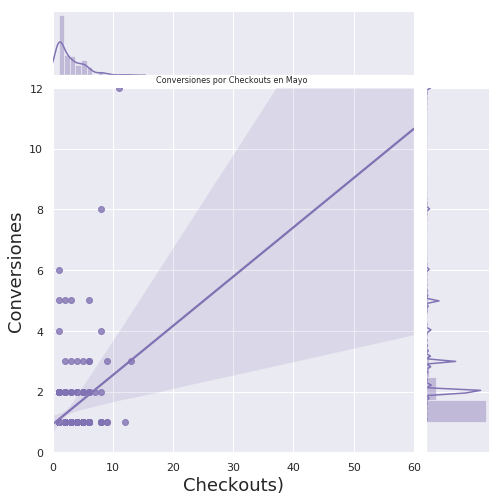

In [24]:

g = sns.jointplot( "cantidad_Checkouts", "cantidad_Conversiones", data=checksVsVisits, kind="reg",
                  xlim=(0, 60), ylim=(0, 12), color="m", height=7)

plt.title('Conversiones por Checkouts en Mayo ', fontsize = 8)
plt.xlabel('Checkouts)',fontsize = 18)
plt.ylabel('Conversiones',fontsize = 18)


* Se observa una gran desviacion de la media entre la cantidad de compra y lo que se lleva al carrito

## Cuales son los dispositivos desde los cuales acceden en Brazil las personas en el mes de Mayo?

In [25]:
disp = persons.groupby('person')['device_type'].value_counts().sort_values(ascending = False)
disp = pd.DataFrame(data = disp)
disp.rename(columns={'device_type': 'cantidad_visitas'}, inplace=True)
disp = disp.reset_index()
dispMay = disp.sort_values(by = 'cantidad_visitas',ascending = False)
dispMay

,person,device_type,cantidad_visitas
0,6b07be7b,Smartphone,142
1,99a7773b,Smartphone,76
2,ca3ff2f0,Computer,73
3,e69addc7,Smartphone,64
4,5f25cb5d,Computer,57
5,5af7e2bc,Computer,56
6,a202cfba,Smartphone,53
7,3e34b3cf,Smartphone,48
8,2eeeadbd,Computer,46
9,74725078,Computer,45


* Se puede observar que el usuario 6b07be7b accedio mayor cantidad de veces desde su smartphone

 *En su mayoria acceden desde el smartphone y la computadora*

In [26]:
dispMay.groupby('device_type')['cantidad_visitas'].sum().sort_values(ascending = False)

device_type
Smartphone    19587
Computer      18524
Tablet          572
Unknown          62
Name: cantidad_visitas, dtype: int64

### Conversiones en funcion del dispositivo utilizado

In [27]:
#Creo un df con las personas que convirtieron en mayo (Brazil)
convMayo =  persons1[(persons1['event'] == 'conversion') & (persons1['person'].isin(dispMay['person'].values))]
convM =  convMayo.groupby('person')['event'].count()
convM = convM.reset_index()
convM.rename(columns={'event': 'cantidad_Conversiones'}, inplace=True)
convM

,person,cantidad_Conversiones
0,02a6f9b5,1
1,042a2a99,1
2,0585daeb,1
3,06c1730a,1
4,08f12b82,1
5,0a37e81a,4
6,0b252419,3
7,0becc3da,1
8,0c22cc51,1
9,0e392c9e,1


In [28]:
#joineo para tener las conversiones por device_type 
nuevoDf = pd.merge(dispMay, convM,on = 'person', how='left').dropna()
nuevoDf

,person,device_type,cantidad_visitas,cantidad_Conversiones
0,6b07be7b,Smartphone,142,1.0
4,5f25cb5d,Computer,57,1.0
5,5af7e2bc,Computer,56,1.0
8,2eeeadbd,Computer,46,1.0
13,3c7691f1,Computer,42,1.0
17,10e475f9,Computer,39,1.0
22,68659ed1,Computer,38,2.0
26,d9251b63,Computer,34,1.0
28,db6f0288,Computer,33,1.0
29,9baae723,Smartphone,31,1.0


Text(0,0.5,'conversiones')

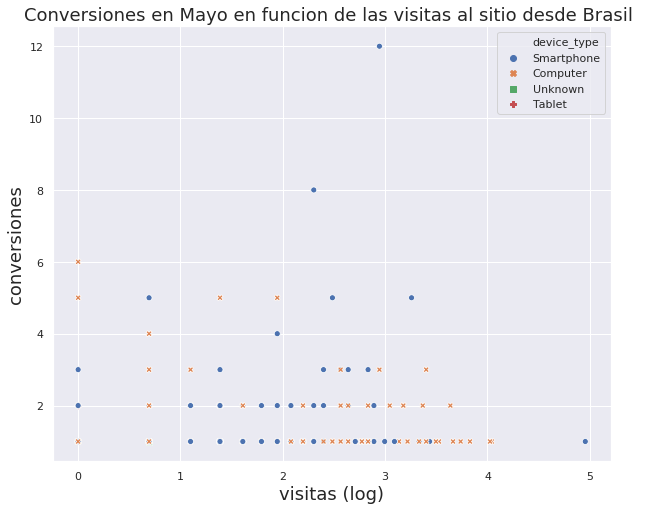

In [29]:
nuevoDf['visitas_log'] = np.log(nuevoDf['cantidad_visitas'])
plt.figure(figsize=(10,8))
ax = sns.scatterplot(x="visitas_log", y="cantidad_Conversiones", hue="device_type",style="device_type",data=nuevoDf,\
                     )
plt.title('Conversiones en Mayo en funcion de las visitas al sitio desde Brasil ', fontsize = 18)
plt.xlabel('visitas (log)',fontsize = 18)
plt.ylabel('conversiones',fontsize = 18)

* Se puede observar que hay pocas conversiones de personas por arriba de 3 y la cantidad de visitas no parece ser un factor que atribuya a la compra de manera que en la mitad de las visitas al sitio se produce la mayor cantidad de conversiones.
* Se puede ver tambien que la mayoria de las convesiones se realizan mediante el smarthphone siguiendole la computadora

### Checkouts en funcion del dispositivo utilizado

In [30]:
#Creo un df con las personas que realizaron checkouts en mayo (Brazil)
checksMayo =  persons1[(persons1['event'] == 'checkout') & (persons1['person'].isin(dispMay['person'].values))]
check2 =  checksMayo.groupby('person')['event'].count()
check2 = check2.reset_index()
check2.rename(columns={'event': 'cantidad_checkouts'}, inplace=True)
check2

,person,cantidad_checkouts
0,0004b0a2,1
1,0006a21a,1
2,000a54b2,1
3,00184bf9,2
4,0019c395,1
5,001f1653,1
6,0024a82b,1
7,0024ad28,1
8,002932b1,1
9,002cecfa,1


In [31]:
#joineo para tener todo junto por device_type y persona
join2 = pd.merge(nuevoDf, check2,on = 'person', how='outer').dropna()
join2

,person,device_type,cantidad_visitas,cantidad_Conversiones,visitas_log,cantidad_checkouts
0,6b07be7b,Smartphone,142.0,1.0,4.955827,2.0
1,6b07be7b,Computer,2.0,1.0,0.693147,2.0
2,5f25cb5d,Computer,57.0,1.0,4.043051,2.0
3,5f25cb5d,Smartphone,4.0,1.0,1.386294,2.0
4,5af7e2bc,Computer,56.0,1.0,4.025352,3.0
5,2eeeadbd,Computer,46.0,1.0,3.828641,3.0
6,2eeeadbd,Smartphone,6.0,1.0,1.791759,3.0
7,3c7691f1,Computer,42.0,1.0,3.737670,2.0
8,10e475f9,Computer,39.0,1.0,3.663562,5.0
9,10e475f9,Smartphone,2.0,1.0,0.693147,5.0


**Comparando con la cantidad de conversiones en funcion de dispositivo utilizado**

Text(10.175,0.5,'Cantidad de checkouts')

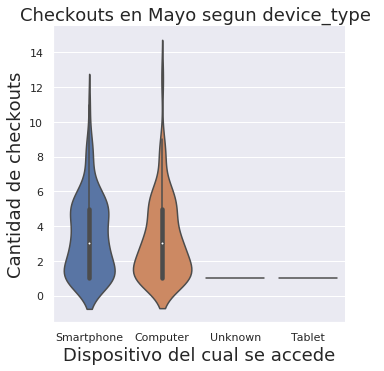

In [54]:
#Aqui un pequenio grafico de los checkouts en funcion del dispositivo utilizado
sns.catplot(x="device_type", y="cantidad_checkouts", kind="violin", data=join2);
plt.title('Checkouts en Mayo segun device_type ', fontsize = 18)
plt.xlabel('Dispositivo del cual se accede',fontsize = 18)
plt.ylabel('Cantidad de checkouts',fontsize = 18)

Text(0.5,6.8,'Dispositivo del cual se accede')

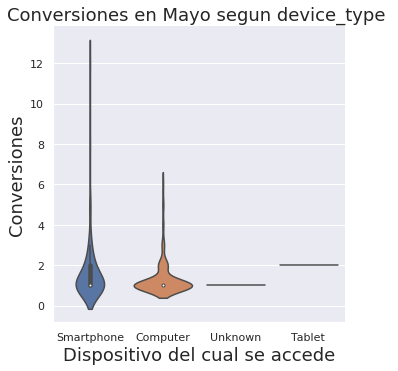

In [57]:

sns.catplot(x="device_type", y="cantidad_Conversiones", kind="violin", data=join2);
plt.title('Conversiones en Mayo segun device_type ', fontsize = 18)
plt.ylabel('conversiones',fontsize = 18)
plt.xlabel('Dispositivo del cual se accede',fontsize = 18)

**Conclusiones**
* Se puede observar una mayor distribucion en los checkouts 
* En el grafico de la cantidad de conversiones se tienen menores conversiones por computadora
* Se tienen muchos outliers de los que acceden desde Smartphone y convierten
* Los que acceden mediante Tablets tienen cantidades similares
* En conclusion los que acceden desde el smartphone realizan mas conversiones

## Cantidad de conversiones y checkouts en funcion del campaign source en Brazil

origenCampania = troca_persons[(troca_persons['person'].isin(dispMay['person'].values))]

In [80]:
origenCampania = origenCampania[['person','campaign_source']]
join3 = pd.merge(origenCampania,join2,on = 'person', how='left').dropna()

Text(0,0.5,'Cantidad de conversiones')

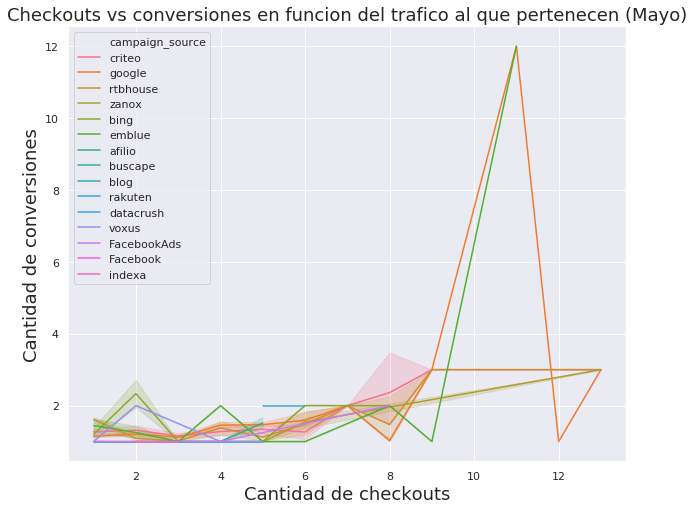

In [91]:
plt.figure(figsize=(10,8))
ax= sns.lineplot(x="cantidad_checkouts", y="cantidad_Conversiones",hue="campaign_source",data=join3)

plt.title('Checkouts vs conversiones en funcion del trafico al que pertenecen (Mayo)', fontsize = 18)
plt.xlabel('Cantidad de checkouts',fontsize = 18)
plt.ylabel('Cantidad de conversiones',fontsize = 18)

**A medida que los checkouts crecen las conversiones tambien, gracias a google y emblue, mientras que criteo y rtbhouse funcionan con una menor cantidad de checkouts**

### Claramente hay una gran perdida de personas en el medio antes de llegar a la conversion:
* Los leads no afecta a ello debido a que son una pequenia parte.
* Los dispositivos mas buscados son los iphone teniendo mayor relevancia el iphone 6 pero si miramos las conversiones en su mayoria se realizan sobre el Samsung J7 que tiene la mitad de busquedas en el sitio.
* Esto es un indicador de que el precio del iphone 6 es superior al del J7 por lo que muchos usuarios que llegan al checkout pueden decidir no comprarlo (ver dispositivos con mas checkouts en archivo Models.ipynb)
* Ademas con mas checkouts lideran muchos Samsung de los modelos S que son los mas caros, aunque no lideran estos las conversiones.(ver Models.ipynb)
* Se podria aplicar algun tipo de oferta bancaria sobre alguno de estos modelos, para mejorar la competencia con otras webs.
* En general muchos usuarios utilizan estas webs para comparar precios, la mayoria de checkouts no son indicadores de compradores